In [17]:
print("task 1")

task 1


In [5]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Convert to a DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target column (species)
iris_df['species'] = iris.target

# Display the first 5 rows
iris_df.head()
# Summary statistics
iris_df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [18]:
print("task2")

task2


In [6]:
# Check for missing values
iris_df.isnull().sum()



sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

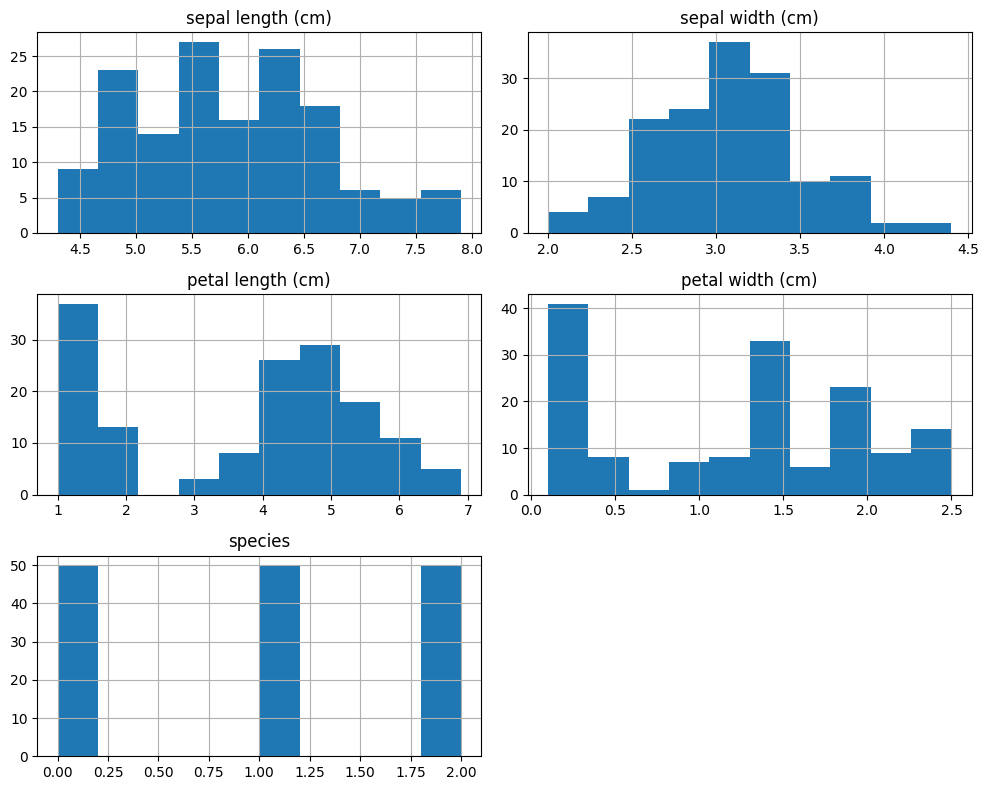

In [7]:
import matplotlib.pyplot as plt

# Plot histograms for each feature
iris_df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


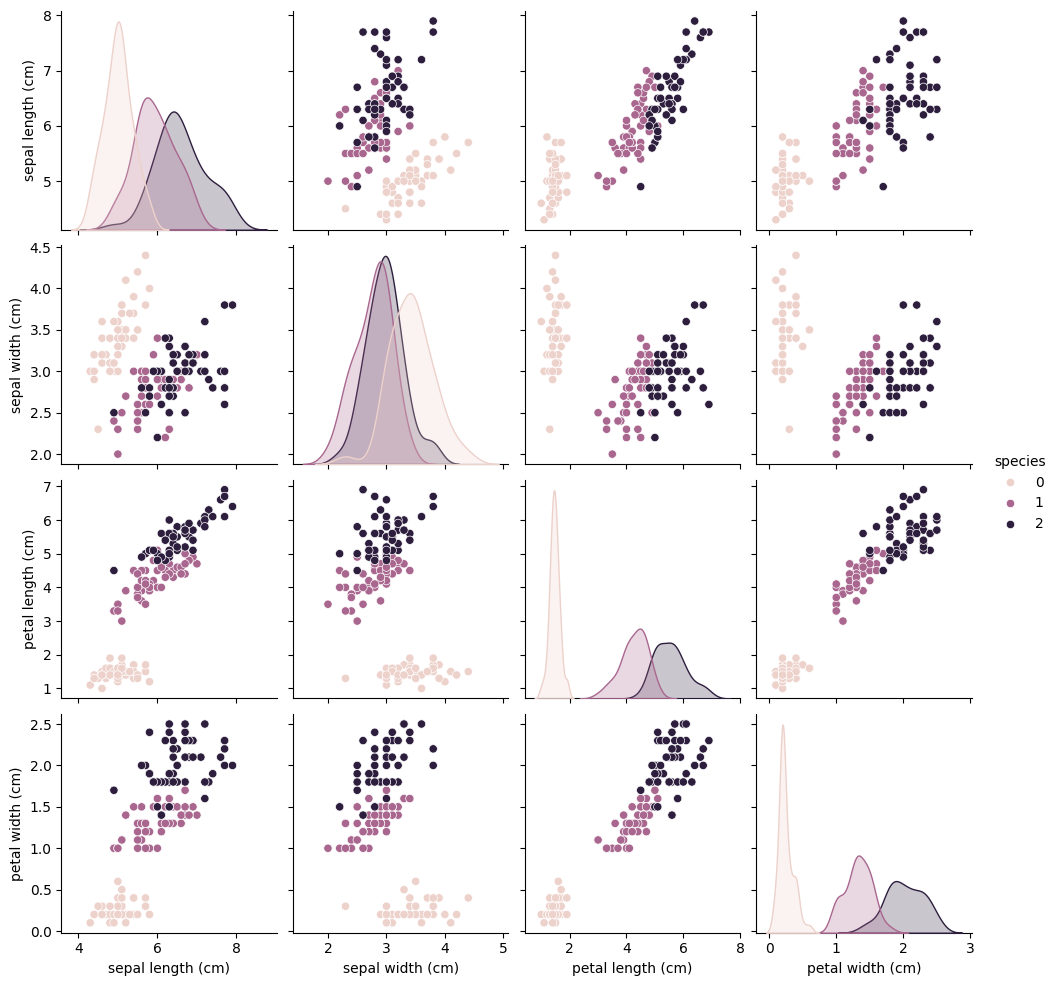

In [8]:
import seaborn as sns

# Pair plot to visualize relationships between features
sns.pairplot(iris_df, hue='species')
plt.show()


In [19]:
print("task 3")

task 3


In [9]:
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Standardize features
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Convert back to DataFrame and display
pd.DataFrame(X_standardized, columns=iris.feature_names).head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [10]:
from sklearn.preprocessing import MinMaxScaler

# Perform Min-Max scaling
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)

# Convert back to DataFrame and display
pd.DataFrame(X_minmax, columns=iris.feature_names).head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable (species)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Display the first 5 encoded target values
print(y_encoded[:5])


[0 0 0 0 0]


In [20]:
print("task 4")

task 4


In [13]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_encoded, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (120, 4), y_train: (120,)
Testing set shape: X_test: (30, 4), y_test: (30,)


In [21]:
print("task 5- BONUS TASK")

task 5- BONUS TASK


In [14]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Convert to DataFrame for plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
pca_df['species'] = y_encoded


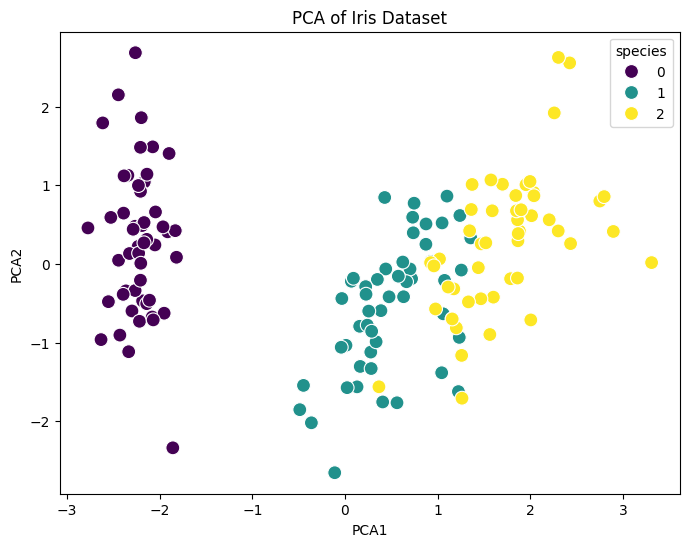

In [15]:
# Plot PCA results with species as color
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='species', data=pca_df, palette='viridis', s=100)
plt.title('PCA of Iris Dataset')
plt.show()
